## Load Dataset

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [19]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Encode 

In [20]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.Married = df.Married.map({'Yes': 1, 'No': 0})
df.Dependents = df.Dependents.map({'0': 0, '1': 1, '2': 2,  '3+': 3})
df.Education = df.Education.map({'Graduate': 1, 'Not Graduate': 0})
df.Self_Employed = df.Self_Employed.map({'Yes': 1, 'No': 0})
df.Property_Area = df.Property_Area.map(
    {'Urban': 1, 'Semiurban': 0.5, 'Rural': 0})
df = df.fillna({'Gender': 0.5, 'Married': 0.5,
                'Dependents': df['Dependents'].mean(),
                'Self_Employed': df['Self_Employed'].mean(),
                'LoanAmount': df['LoanAmount'].mean(),
                'Loan_Amount_Term': df['Loan_Amount_Term'].mean(),
                'Credit_History': df['Credit_History'].mean()})

df.Loan_Status = df.Loan_Status.map({'Y': 1, 'N': 0})


## Data process

In [21]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
train = df.sample(frac=0.9, random_state=3, axis=0)
test = df[~df.index.isin(train.index)]

X_train = train.loc[:, 'Gender':'Loan_Status']
Y_train = train.loc[:, 'Loan_Status':'Loan_Status']
X_test = test.loc[:, 'Gender':'Loan_Status']
Y_test = test.loc[:, 'Loan_Status':'Loan_Status']


## Train

In [22]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

loss_1 = []
LR_1 = LogisticRegression(0.001, 500, loss_1)
LR_1.fit(X_train, Y_train)

loss_2 = []
LR_2 = LogisticRegression(0.01, 500, loss_2)
LR_2.fit(X_train, Y_train)


1 [2346.89466973] 1
2 [2082.9699617] 2
3 [1837.20126692] 3
4 [1611.18114806] 4
5 [1407.13040015] 5
6 [1227.59174384] 6
7 [1074.75709825] 7
8 [949.55462006] 8
9 [850.93846986] 9
10 [775.88031064] 10
11 [720.11844329] 11
12 [679.17929887] 12
13 [649.1304763] 13
14 [626.8846119] 14
15 [610.17828504] 15
16 [597.41275689] 16
17 [587.47682147] 17
18 [579.60012548] 18
19 [573.24559152] 19
20 [568.0348677] 20
21 [563.69794599] 21


/Users/howlin0523/Documents/GitHub/22F_Introduction_to_Machine_Learning/lab1/Logistic.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_x.iloc[:, i] = (


22 [560.03938799] 22
23 [556.91565056] 23
24 [554.21975956] 24
25 [551.87084878] 25
26 [549.80693879] 26
27 [547.97989228] 27
28 [546.3518468] 28
29 [544.89266151] 29
30 [543.57806781] 30
31 [542.38831448] 31
32 [541.30716367] 32
33 [540.32113898] 33
34 [539.41895644] 34
35 [538.59108941] 35
36 [537.82943282] 36
37 [537.12704155] 37
38 [536.47792476] 38
39 [535.87688289] 39
40 [535.31937726] 40
41 [534.80142512] 41
42 [534.31951436] 42
43 [533.8705338] 43
44 [533.45171582] 44
45 [533.06058879] 45
46 [532.69493739] 46
47 [532.35276936] 47
48 [532.03228739] 48
49 [531.73186536] 49
50 [531.45002796] 50
51 [531.1854334] 51
52 [530.93685832] 52
53 [530.70318497] 53
54 [530.48338988] 54
55 [530.27653414] 55
56 [530.0817548] 56
57 [529.89825738] 57
58 [529.72530924] 58
59 [529.56223374] 59
60 [529.40840507] 60
61 [529.26324361] 61
62 [529.12621188] 62
63 [528.99681084] 63
64 [528.87457662] 64
65 [528.75907755] 65
66 [528.64991157] 66
67 [528.54670375] 67
68 [528.44910421] 68
69 [528.35678612]

## Test

In [23]:
pre_1 = LR_1.predict(X_test)
LR_1.evaluate(pre_1, Y_test)

pre_2 = LR_2.predict(X_test)
LR_2.evaluate(pre_2, Y_test)


correct rate: 0.9672131147540983
correct rate: 1.0


/Users/howlin0523/Documents/GitHub/22F_Introduction_to_Machine_Learning/lab1/Logistic.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_x.iloc[:, i] = (test_x.iloc[:, i] -


## loss curve

500
500


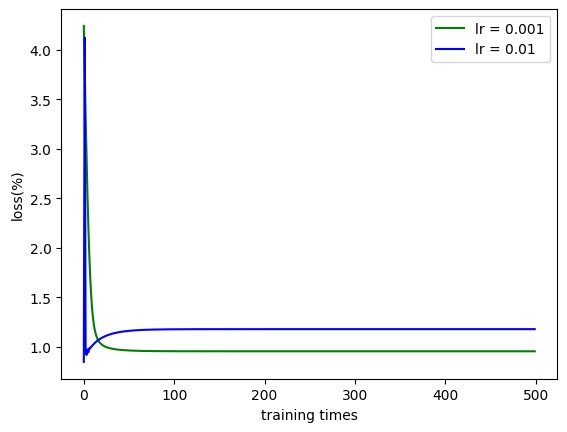

In [24]:
from cProfile import label


times_1 = np.arange(0, LR_1.tr_times)
losses_1 = np.array(LR_1.loss).flatten()
print(LR_1.tr_times)
print(len(LR_1.loss))

l1, = plt.plot(times_1, losses_1, label='lr = 0.001', color = 'g')

times_2 = np.arange(0, LR_2.tr_times)
losses_2 = np.array(LR_2.loss).flatten()
l2, = plt.plot(times_2, losses_2, label='lr = 0.01', color = 'b')


plt.xlabel("training times")
plt.ylabel("loss(%)")
plt.legend(loc='upper right')

plt.show()
